# Generating Text with Neural Networks

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# building the word vocabulary

In [4]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split('\n')
corpus

['in the town of athy one jeremy lanigan ',
 ' battered away til he hadnt a pound. ',
 'his father died and made him a man again ',
 ' left him a farm and ten acres of ground. ',
 'he gave a grand party for friends and relations ',
 'who didnt forget him when come to the wall, ',
 'and if youll but listen ill make your eyes glisten ',
 'of the rows and the ructions of lanigans ball. ',
 'myself to be sure got free invitation, ',
 'for all the nice girls and boys i might ask, ',
 'and just in a minute both friends and relations ',
 'were dancing round merry as bees round a cask. ',
 'judy odaly, that nice little milliner, ',
 'she tipped me a wink for to give her a call, ',
 'and i soon arrived with peggy mcgilligan ',
 'just in time for lanigans ball. ',
 'there were lashings of punch and wine for the ladies, ',
 'potatoes and cakes; there was bacon and tea, ',
 'there were the nolans, dolans, ogradys ',
 'courting the girls and dancing away. ',
 'songs they went round as plenty as wat

In [5]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)

total_Words=len(tokenizer.word_index)+1

In [6]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'a': 3,
 'in': 4,
 'all': 5,
 'i': 6,
 'for': 7,
 'of': 8,
 'lanigans': 9,
 'ball': 10,
 'were': 11,
 'at': 12,
 'to': 13,
 'she': 14,
 'stepped': 15,
 'his': 16,
 'girls': 17,
 'as': 18,
 'they': 19,
 'til': 20,
 'he': 21,
 'again': 22,
 'got': 23,
 'boys': 24,
 'round': 25,
 'that': 26,
 'her': 27,
 'there': 28,
 'three': 29,
 'weeks': 30,
 'up': 31,
 'out': 32,
 'him': 33,
 'was': 34,
 'spent': 35,
 'learning': 36,
 'new': 37,
 'steps': 38,
 'long': 39,
 'away': 40,
 'left': 41,
 'friends': 42,
 'relations': 43,
 'when': 44,
 'wall': 45,
 'myself': 46,
 'nice': 47,
 'just': 48,
 'dancing': 49,
 'merry': 50,
 'tipped': 51,
 'me': 52,
 'soon': 53,
 'time': 54,
 'old': 55,
 'their': 56,
 'them': 57,
 'danced': 58,
 'dublin': 59,
 'an': 60,
 'put': 61,
 'leg': 62,
 'miss': 63,
 'fainted': 64,
 'from': 65,
 'town': 66,
 'athy': 67,
 'one': 68,
 'jeremy': 69,
 'lanigan': 70,
 'battered': 71,
 'hadnt': 72,
 'pound': 73,
 'father': 74,
 'died': 75,
 'made': 76,
 'man'

In [7]:
total_Words

263

# preprocessing the dataset

In [31]:
input_sequence=[]

for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence=token_list[:i+1]
        # print(n_gram_sequence)
        input_sequence.append(n_gram_sequence)
max_sequence_len=max([len(x) for x in input_sequence])

input_sequences=np.array(pad_sequences(input_sequence,maxlen=max_sequence_len,padding='pre'))
xs,labels=input_sequences[:,:-1], input_sequences[:,-1]
#one hot encoding
ys=tf.keras.utils.to_categorical(labels,num_classes=total_Words)
print(input_sequences)
print(labels)

[[  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 [  0   0   0 ...   2  66   8]
 ...
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]
 [  0   0   0 ...  13   9  10]]
[  2  66   8  67  68  69  70  40  20  21  72   3  73  74  75   1  76  33
   3  77  22  33   3  78   1  79  80   8  81  82   3  83  84   7  42   1
  43  86  87  33  44  88  13   2  45  89  90  91  92  93  94  95  96  97
   2  98   1   2  99   8   9  10  13 100 101  23 102 103   5   2  47  17
   1  24   6 104 105  48   4   3 106 107  42   1  43  49  25  50  18 108
  25   3 109 111  26  47 112 113  51  52   3 114   7  13 115  27   3 116
   6  53 117 118 119 120   4  54   7   9  10  11 121   8 122   1 123   7
   2 124   1 126  28  34 127   1 128  11   2 129 130 131   2  17   1  49
  40  19 134  25  18 135  18 136 137  26 138 139   4 140  55 141 143 144
   1   2 145 146 147 148 149  12   9  10  11 150   5 151   8 152 153  25
   2 154   4   3 155   1   6 157 158  56 159  51  57   2 160   8   3 161
   1 

In [25]:
sentence=corpus[0].split()
print(f'sample sentence:{sentence}')
token_list=[]

for word in sentence:
    token_list.append(tokenizer.word_index[word])
print(token_list)

sample sentence:['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [27]:
elem_number=6
print(f'token list:{xs[elem_number]}')
print(f'decode to text:{tokenizer.sequences_to_texts([xs[elem_number]])}')

token list:[ 0  0  0  4  2 66  8 67 68 69]
decode to text:['in the town of athy one jeremy']


In [28]:
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


In [40]:
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')
print(corpus[0])
tokenizer.word_index

token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70
in the town of athy one jeremy lanigan 


{'and': 1,
 'the': 2,
 'a': 3,
 'in': 4,
 'all': 5,
 'i': 6,
 'for': 7,
 'of': 8,
 'lanigans': 9,
 'ball': 10,
 'were': 11,
 'at': 12,
 'to': 13,
 'she': 14,
 'stepped': 15,
 'his': 16,
 'girls': 17,
 'as': 18,
 'they': 19,
 'til': 20,
 'he': 21,
 'again': 22,
 'got': 23,
 'boys': 24,
 'round': 25,
 'that': 26,
 'her': 27,
 'there': 28,
 'three': 29,
 'weeks': 30,
 'up': 31,
 'out': 32,
 'him': 33,
 'was': 34,
 'spent': 35,
 'learning': 36,
 'new': 37,
 'steps': 38,
 'long': 39,
 'away': 40,
 'left': 41,
 'friends': 42,
 'relations': 43,
 'when': 44,
 'wall': 45,
 'myself': 46,
 'nice': 47,
 'just': 48,
 'dancing': 49,
 'merry': 50,
 'tipped': 51,
 'me': 52,
 'soon': 53,
 'time': 54,
 'old': 55,
 'their': 56,
 'them': 57,
 'danced': 58,
 'dublin': 59,
 'an': 60,
 'put': 61,
 'leg': 62,
 'miss': 63,
 'fainted': 64,
 'from': 65,
 'town': 66,
 'athy': 67,
 'one': 68,
 'jeremy': 69,
 'lanigan': 70,
 'battered': 71,
 'hadnt': 72,
 'pound': 73,
 'father': 74,
 'died': 75,
 'made': 76,
 'man'

# build the model

In [42]:
model=Sequential([
    Embedding(total_Words, 64, input_length=max_sequence_len-1),
    Bidirectional(LSTM(20)),
    Dense(total_Words, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history=model.fit(xs,ys,epochs=500)

Epoch 1/500
15/15 [==============================] - 6s 19ms/step - loss: 5.5687 - accuracy: 0.0243
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5478 - accuracy: 0.0530
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5056 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.3736 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1618 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0707 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0319 - accuracy: 0.0574
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9980 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9667 - accuracy: 0.0552
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9328 - accuracy: 0.0662
Epoch 11

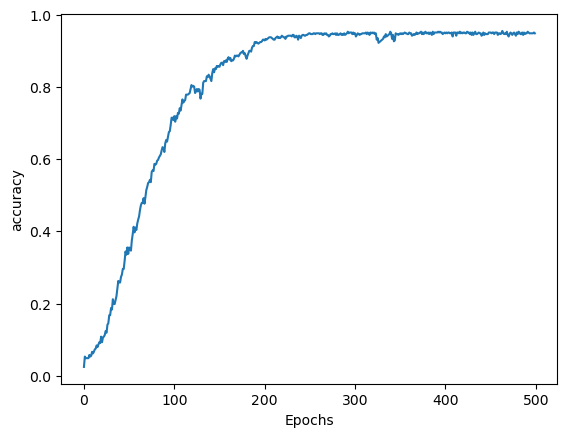

In [44]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# generating Text
With the model trained, you can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. See how it is implemented in the code below:

In [50]:
seed_text='Laurence went to Dublin'
next_words=100
for _ in range(next_words):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list],maxlen=max_sequence_len-1, padding='pre')
    probabilities=model.predict(token_list)
    predicted=np.argmax(probabilities,axis=-1)[0]
    if predicted!=0:
        output_word=tokenizer.index_word[predicted]
        seed_text+=' '+output_word
print(seed_text)

1/1 [==============================] - 0s 19ms/step
Laurence went to Dublin the rat catchers catchers daughter glisten glisten rose saw round merry he how again again new i suppose had would fall with hall with eyes he ned rose rose glisten had ceiling fall gave hall with eyes creature replied creature replied gave of rose ned rose hall rose ned rose hall hall ned with round eyes creature replied gave he come i ball stepped how how new i ball i suppose cried terrance suppose boys gave ask ask hall had painted ask glisten relations relations had ceiling fall with eyes saw creature replied creature ned rose rose glisten ned hall


# to avoid frequent repetition of words

In [55]:
seed_text='Laurence went to Dublin'
next_words=100

for _ in range(next_words):
    token_list=tokenizer.texts_to_sequences(seed_text)[0]
    token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    probabilities=model.predict(token_list)
    choice=np.random.choice([1,2,3])
    predicted=np.argsort(probabilities)[0][-choice]
    if predicted !=0:
        output_word=tokenizer.index_word[predicted]
        seed_text+=' '+output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
Laurence went to Dublin mavrone i i i mavrone i were were were were were mavrone mavrone i mavrone mavrone i i i i mavrone were were were mavrone mavrone were mavrone mavrone i were mavrone were mavrone mavrone mavrone i i mavrone were i were mavrone i were i i i were i were mavrone were mavrone i mavrone mavrone mavrone were i mavrone mavrone mavrone were i i were were were mavrone i mavrone i mavrone were were were were were were were mavrone i i mavrone were i were i i i mavrone mavrone mavrone mavrone were i were i were
